In [ ]:
import psycopg2

In [9]:
import pandas as pd

In [10]:
pd.read_csv("musteri.csv").head()

,MusteriNo,KayitTarihi,IptalTarihi,CihazTipId,Cinsiyet,Yas
0,1,2024-03-10,2024-04-30,2,Erkek,52
1,2,2024-05-04,2024-08-24,3,Erkek,34
2,3,2024-05-20,2024-05-31,2,Diğer,67
3,4,2024-04-20,2024-07-03,1,Diğer,66
4,5,2024-02-16,2024-06-22,1,Kadın,26


In [13]:
pd.read_csv("cihaz_tanim.csv").head()

,CihazTipId,CihazTanim
0,1,iOS
1,2,Android
2,3,Web


In [14]:
pd.read_csv("anket_tanim.csv").head()

,AnketId,AnketTanim
0,1,Uygulamanın görüntüsünü beğendiniz mi (1-5)?
1,2,Uygulamanın Hızı Nasıl (1-5)?
2,3,Uygulamanın Kullanım Zorluğunu 1den 5 e kadar ...


In [15]:
pd.read_csv("anket_puan.csv").head()

,Müşteri Numarası,Anket ID,Puan
0,693,1,5
1,693,2,5
2,693,3,2
3,3307,1,2
4,3307,2,2


In [3]:
# PostgreSQL bağlantısı
try:
    connection = psycopg2.connect(
        user="postgres",
        password="1344",
        host="localhost",
        port="5432",
        database="CaseStudyPython"
    )
    print("Bağlantı başarılı!")

   def fetch_table_data(conn, table_name):
        cursor = conn.cursor()
        cursor.execute(f"SELECT * FROM {table_name};")
        columns = [desc[0] for desc in cursor.description]
        df = pd.DataFrame(cursor.fetchall(), columns=columns)
        cursor.close()
        return df    # Veri tablolarını yükleme fonksiyonu
 
except (Exception, psycopg2.Error) as error:
    print("PostgreSQL bağlantı hatası:", error)

Bağlantı başarılı!


In [5]:
# Müşteri, Anket Tanımı ve Cihaz Tanımı Anket puanları tablolarını yükleme

df_musteri = fetch_table_data(connection,"musteri")
df_musteri

,musterino,kayittarihi,iptaltarihi,cihaztipid,cinsiyet,yas
0,1,2024-03-10,2024-04-30,2,Erkek,52
1,2,2024-05-04,2024-08-24,3,Erkek,34
2,3,2024-05-20,2024-05-31,2,Diğer,67
3,4,2024-04-20,2024-07-03,1,Diğer,66
4,5,2024-02-16,2024-06-22,1,Kadın,26
...,...,...,...,...,...,...
4995,4996,2024-05-21,None,2,Erkek,57
4996,4997,2024-05-13,None,3,Kadın,63
4997,4998,2024-05-14,None,3,Kadın,62
4998,4999,2024-06-26,None,3,Erkek,38


In [6]:
df_anket_tanim = fetch_table_data(connection,"anket_tanim")
df_anket_tanim

,anketid,ankettanim
0,1,Uygulamanın görüntüsünü beğendiniz mi (1-5)?
1,2,Uygulamanın Hızı Nasıl (1-5)?
2,3,Uygulamanın Kullanım Zorluğunu 1den 5 e kadar ...


In [7]:
df_cihaz_tanim = fetch_table_data(connection,"cihaz_tanim")
df_cihaz_tanim

,cihaztipid,cihaztanim
0,1,iOS
1,2,Android
2,3,Web


In [8]:
df_anket_puan = fetch_table_data(connection,"anket_puan")
df_anket_puan

,anketid,musterino,puan
0,2216,1,3
1,2216,2,3
2,2216,3,5
3,2460,1,1
4,2460,2,2
...,...,...,...
22489,3,4997,3
22490,3,4999,4
22491,3,5000,5
22492,2,5000,4


In [12]:
df_musteri['kayittarihi'] = pd.to_datetime(df_musteri['kayittarihi'], errors= 'coerce')
df_musteri['iptaltarihi'] = pd.to_datetime(df_musteri['iptaltarihi'], errors='coerce')

In [20]:
kayit_adedi = df_musteri.groupby(df_musteri['kayittarihi'].dt.to_period('M').dt.strftime('%Y-%m')).size().reset_index(name='kayit_adedi')
kayit_adedi

,kayittarihi,kayit_adedi
0,2024-01,833
1,2024-02,770
2,2024-03,854
3,2024-04,867
4,2024-05,839
5,2024-06,837


In [21]:
iptal_adedi = df_musteri[df_musteri['iptaltarihi'].notnull()].groupby(df_musteri['kayittarihi'].dt.to_period('M').dt.strftime('%Y-%m')).size().reset_index(name='iptal_adedi')

In [22]:
iptal_adedi

,kayittarihi,iptal_adedi
0,2024-01,157
1,2024-02,125
2,2024-03,110
3,2024-04,149
4,2024-05,131
5,2024-06,128


In [23]:
cihaz_kayıt_adedi = df_musteri.groupby([df_musteri['kayittarihi'].dt.to_period('M').dt.strftime('%Y-%m'),'cihaztipid']).size().unstack(fill_value=0).reset_index()

In [24]:
cihaz_kayıt_adedi

cihaztipid,kayittarihi,1,2,3
0,2024-01,278,293,262
1,2024-02,244,270,256
2,2024-03,277,277,300
3,2024-04,297,278,292
4,2024-05,278,288,273
5,2024-06,274,269,294


In [25]:
cinsiyet_adedi = df_musteri.groupby([df_musteri['kayittarihi'].dt.to_period('M').dt.strftime('%Y-%m'),'cinsiyet']).size().unstack(fill_value=0).reset_index()

In [26]:
cinsiyet_adedi

cinsiyet,kayittarihi,Diğer,Erkek,Kadın
0,2024-01,295,278,260
1,2024-02,290,232,248
2,2024-03,271,297,286
3,2024-04,279,282,306
4,2024-05,280,281,278
5,2024-06,267,293,277


In [27]:
df_anket_puan

,anketid,musterino,puan
0,2216,1,3
1,2216,2,3
2,2216,3,5
3,2460,1,1
4,2460,2,2
...,...,...,...
22489,3,4997,3
22490,3,4999,4
22491,3,5000,5
22492,2,5000,4


In [39]:
anket_puanlari = df_anket_puan.groupby(['anketid']).agg({'puan':'mean'}).reset_index()
anket_puanlari.columns = ['Anket ID', 'ortalama_puan']
anket_puanlari = anket_puanlari.pivot_table(index= df_anket_puan['anketid'], columns = 'Anket ID', values ='ortalama_puan').reset_index()

In [40]:
anket_puanlari

Anket ID,anketid,1,2,3,4,5,6,11,12,14,...,4989,4990,4991,4993,4994,4995,4996,4998,4999,5000
0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,4985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1165,4993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_musteri['yas_segment'] = pd.cut(df_musteri['yas'], bins=[0,30,50,100], labels = ['Genç','Orta Yaşlı','Yaşlı'])

In [46]:
yas_segment_adedi = df_musteri.groupby([df_musteri['kayittarihi'].dt.to_period('M').dt.strftime('%Y-%m'),'yas_segment']).size().unstack(fill_value=0).reset_index()
yas_segment_adedi

C:\Users\buket.yuce\AppData\Local\Temp\ipykernel_1100\1442728033.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yas_segment_adedi = df_musteri.groupby([df_musteri['kayittarihi'].dt.to_period('M').dt.strftime('%Y-%m'),'yas_segment']).size().unstack(fill_value=0).reset_index()


yas_segment,kayittarihi,Genç,Orta Yaşlı,Yaşlı
0,2024-01,214,300,319
1,2024-02,189,301,280
2,2024-03,219,328,307
3,2024-04,201,348,318
4,2024-05,195,315,329
5,2024-06,239,304,294


In [49]:
print(kayit_adedi)
print(iptal_adedi)
print(anket_puanlari)



  kayittarihi  kayit_adedi
0     2024-01          833
1     2024-02          770
2     2024-03          854
3     2024-04          867
4     2024-05          839
5     2024-06          837
  kayittarihi  iptal_adedi
0     2024-01          157
1     2024-02          125
2     2024-03          110
3     2024-04          149
4     2024-05          131
5     2024-06          128
Anket ID  anketid   1   2   3   4   5   6  11  12  14  ...  4989  4990  4991  \
0              12 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   
1              21 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   
2              24 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   
3              33 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   
4              34 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   
...           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   
1163         4985 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   N

In [50]:
print(cihaz_kayıt_adedi)
print(cinsiyet_adedi)
print(yas_segment_adedi)

cihaztipid kayittarihi    1    2    3
0              2024-01  278  293  262
1              2024-02  244  270  256
2              2024-03  277  277  300
3              2024-04  297  278  292
4              2024-05  278  288  273
5              2024-06  274  269  294
cinsiyet kayittarihi  Diğer  Erkek  Kadın
0            2024-01    295    278    260
1            2024-02    290    232    248
2            2024-03    271    297    286
3            2024-04    279    282    306
4            2024-05    280    281    278
5            2024-06    267    293    277
yas_segment kayittarihi  Genç  Orta Yaşlı  Yaşlı
0               2024-01   214         300    319
1               2024-02   189         301    280
2               2024-03   219         328    307
3               2024-04   201         348    318
4               2024-05   195         315    329
5               2024-06   239         304    294


In [51]:
merged_data = pd.merge(kayit_adedi, iptal_adedi, on='kayittarihi', how='outer')

In [52]:
merged_data


,kayittarihi,kayit_adedi,iptal_adedi
0,2024-01,833,157
1,2024-02,770,125
2,2024-03,854,110
3,2024-04,867,149
4,2024-05,839,131
5,2024-06,837,128


In [54]:
merged_data = pd.merge(merged_data,cihaz_kayıt_adedi,on='kayittarihi', how='outer')


In [55]:
merged_data

,kayittarihi,kayit_adedi,iptal_adedi,1,2,3
0,2024-01,833,157,278,293,262
1,2024-02,770,125,244,270,256
2,2024-03,854,110,277,277,300
3,2024-04,867,149,297,278,292
4,2024-05,839,131,278,288,273
5,2024-06,837,128,274,269,294


In [56]:
merged_data = pd.merge(merged_data,cinsiyet_adedi,on='kayittarihi', how='outer')


In [57]:
merged_data

,kayittarihi,kayit_adedi,iptal_adedi,1,2,3,Diğer,Erkek,Kadın
0,2024-01,833,157,278,293,262,295,278,260
1,2024-02,770,125,244,270,256,290,232,248
2,2024-03,854,110,277,277,300,271,297,286
3,2024-04,867,149,297,278,292,279,282,306
4,2024-05,839,131,278,288,273,280,281,278
5,2024-06,837,128,274,269,294,267,293,277


In [58]:
merged_data = pd.merge(merged_data,yas_segment_adedi,on='kayittarihi', how='outer')


In [59]:
merged_data

,kayittarihi,kayit_adedi,iptal_adedi,1,2,3,Diğer,Erkek,Kadın,Genç,Orta Yaşlı,Yaşlı
0,2024-01,833,157,278,293,262,295,278,260,214,300,319
1,2024-02,770,125,244,270,256,290,232,248,189,301,280
2,2024-03,854,110,277,277,300,271,297,286,219,328,307
3,2024-04,867,149,297,278,292,279,282,306,201,348,318
4,2024-05,839,131,278,288,273,280,281,278,195,315,329
5,2024-06,837,128,274,269,294,267,293,277,239,304,294


In [61]:
merged_data.columns = ['kayittarihi','kayit_adedi','iptal_adedi','İOS','Android','Web','Diğer','Erkek','Kadın','Genç','Orta Yaşlı','Yaşlı']

In [65]:
merged_data.columns

Index(['kayittarihi', 'kayit_adedi', 'iptal_adedi', 'İOS', 'Android', 'Web',
       'Diğer', 'Erkek', 'Kadın', 'Genç', 'Orta Yaşlı', 'Yaşlı'],
      dtype='object')

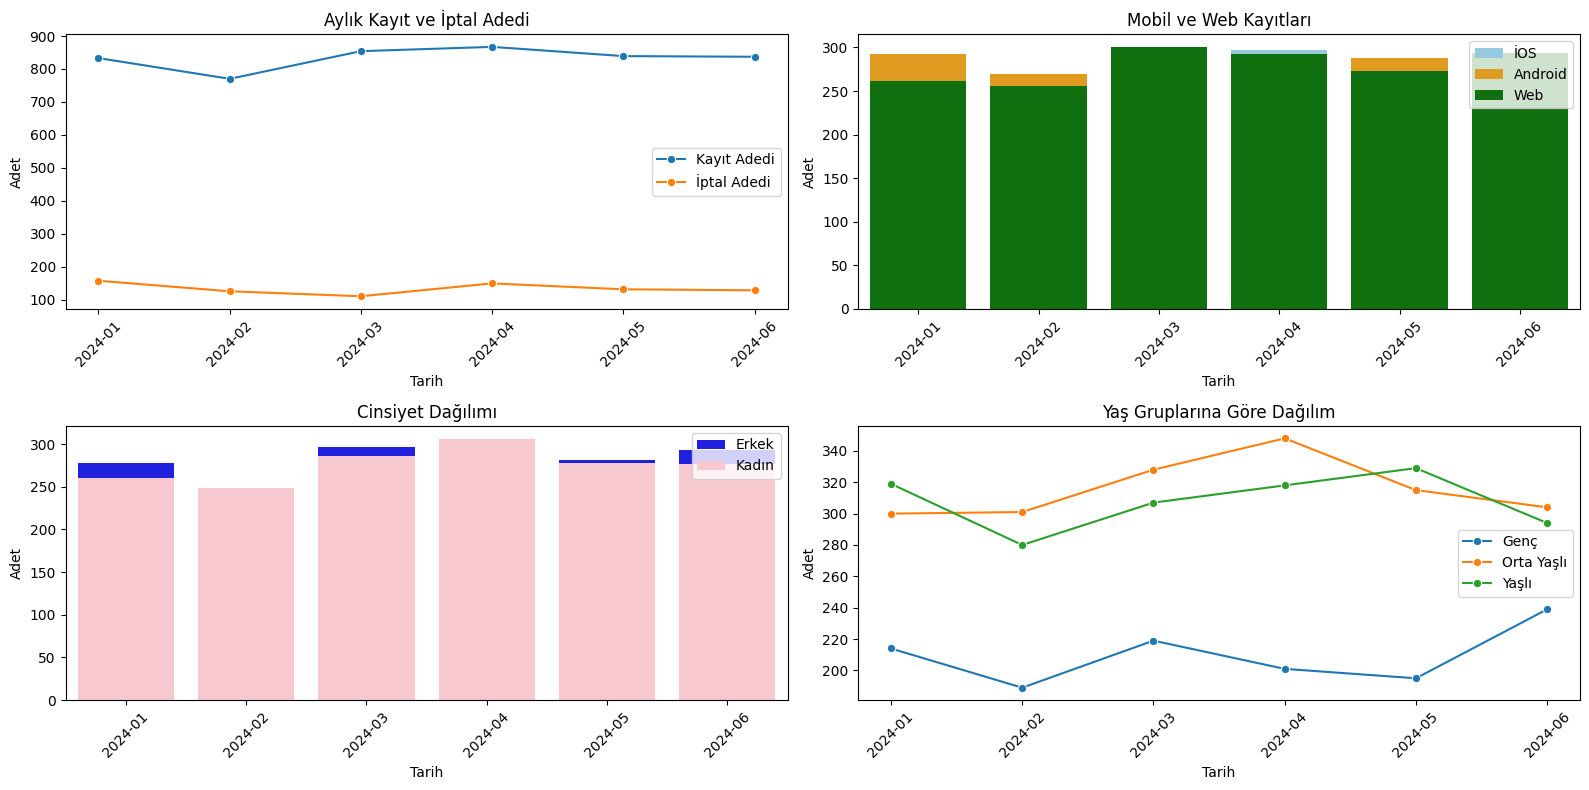

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirmek için plot ayarı
plt.figure(figsize=(16, 8))

# Çizgi grafiği: Kayıt ve İptal Adedi
plt.subplot(2, 2, 1)
sns.lineplot(x='kayittarihi', y='kayit_adedi', data=merged_data, marker='o', label='Kayıt Adedi')
sns.lineplot(x='kayittarihi', y='iptal_adedi', data=merged_data, marker='o', label='İptal Adedi')
plt.title('Aylık Kayıt ve İptal Adedi')
plt.xlabel('Tarih')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.legend()

# Bar grafiği: Mobil ve Web Kayıtları
plt.subplot(2, 2, 2)
sns.barplot(x='kayittarihi', y='İOS', data=merged_data, color='skyblue', label='İOS')
sns.barplot(x='kayittarihi', y='Android', data=merged_data, color='orange', label='Android')
sns.barplot(x='kayittarihi', y='Web', data=merged_data, color='green', label='Web')
plt.title('Mobil ve Web Kayıtları')
plt.xlabel('Tarih')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.legend()

# Bar grafiği: Cinsiyet Dağılımı
plt.subplot(2, 2, 3)
sns.barplot(x='kayittarihi', y='Erkek', data=merged_data, color='blue', label='Erkek')
sns.barplot(x='kayittarihi', y='Kadın', data=merged_data, color='pink', label='Kadın')
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Tarih')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.legend()

# Çizgi grafiği: Yaş Gruplarına Göre Dağılım
plt.subplot(2, 2, 4)
sns.lineplot(x='kayittarihi', y='Genç', data=merged_data, marker='o', label='Genç')
sns.lineplot(x='kayittarihi', y='Orta Yaşlı', data=merged_data, marker='o', label='Orta Yaşlı')
sns.lineplot(x='kayittarihi', y='Yaşlı', data=merged_data, marker='o', label='Yaşlı')
plt.title('Yaş Gruplarına Göre Dağılım')
plt.xlabel('Tarih')
plt.ylabel('Adet')
plt.xticks(rotation=45)
plt.legend()

# Grafikleri gösterme
plt.tight_layout()
plt.show()